In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
data = pd.read_csv(r"C:\Users\Dell\OneDrive\Desktop\unified mentor\Heart Disease data\Heart Disease data\Heart Disease data.csv")

In [3]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
data.duplicated().sum()

723

In [19]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
# 0 : Typical Angina
# 1 : Atypical Angina
# 2 : Non-Anginal Pain
# 3 : Asymptomatic 
#for chest pain (cp) col

# Typical Angina: Chest pain related to reduced blood flow to the heart.
# Atypical Angina: Chest pain not related to heart problems.
# Non-Anginal Pain: Chest pain not related to angina.
# Asymptomatic: No chest pain.

# Angina, also known as angina pectoris, is a type of chest pain 
# or discomfort caused by reduced blood flow to the heart muscle. 

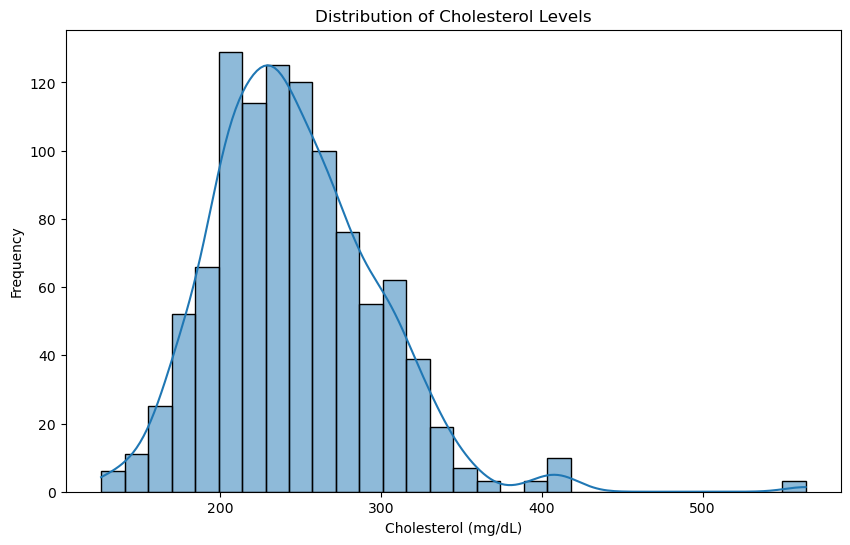

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data['chol'], kde=True, bins=30)
plt.title('Distribution of Cholesterol Levels')
plt.xlabel('Cholesterol (mg/dL)')
plt.ylabel('Frequency')
plt.show()

Correlation between age and maximum heart rate achieved: -0.39022707503159304


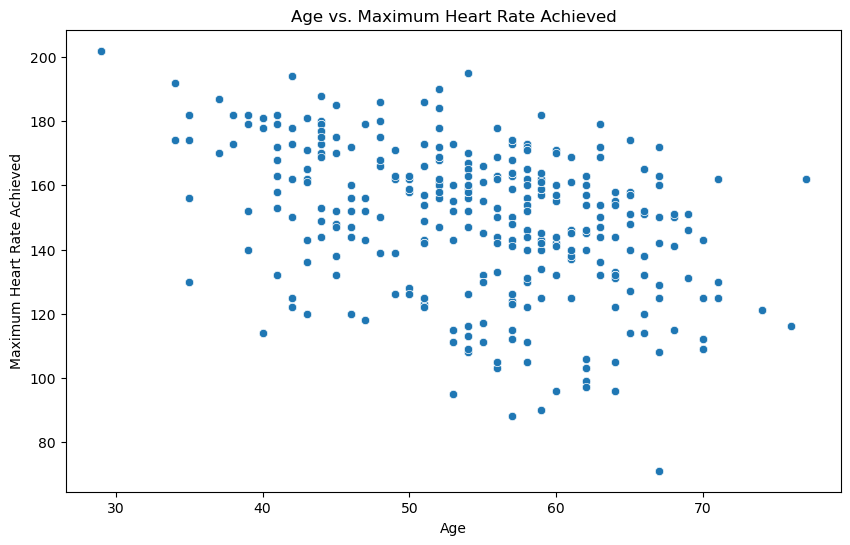

In [13]:
# Assuming there is an 'age' column in the dataset
correlation, _ = pearsonr(data['age'], data['thalach'])
print(f'Correlation between age and maximum heart rate achieved: {correlation}')

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='thalach', data=data)
plt.title('Age vs. Maximum Heart Rate Achieved')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate Achieved')
plt.show()

In [14]:
average_blood_pressure = data.groupby('target')['trestbps'].mean()
print(average_blood_pressure)

target
0    134.106212
1    129.245247
Name: trestbps, dtype: float64


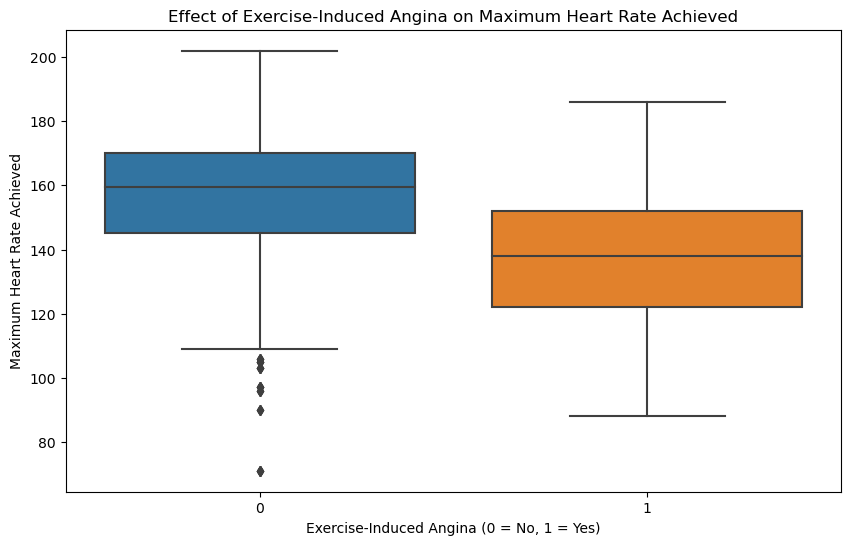

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='exang', y='thalach', data=data)
plt.title('Effect of Exercise-Induced Angina on Maximum Heart Rate Achieved')
plt.xlabel('Exercise-Induced Angina (0 = No, 1 = Yes)')
plt.ylabel('Maximum Heart Rate Achieved')
plt.show()

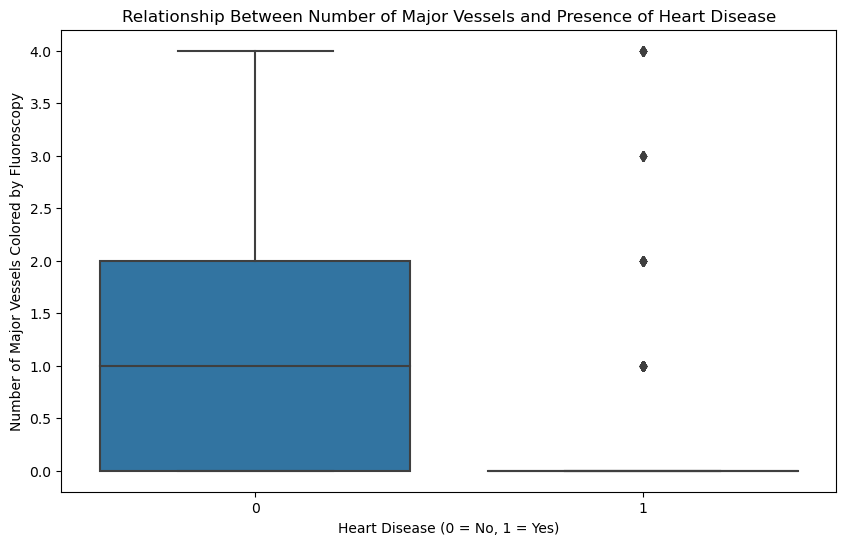

target
0    1.158317
1    0.370722
Name: ca, dtype: float64


In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='ca', data=data)
plt.title('Relationship Between Number of Major Vessels and Presence of Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Number of Major Vessels Colored by Fluoroscopy')
plt.show()

# Group by 'target' and calculate the mean number of major vessels
average_vessels = data.groupby('target')['ca'].mean()
print(average_vessels)

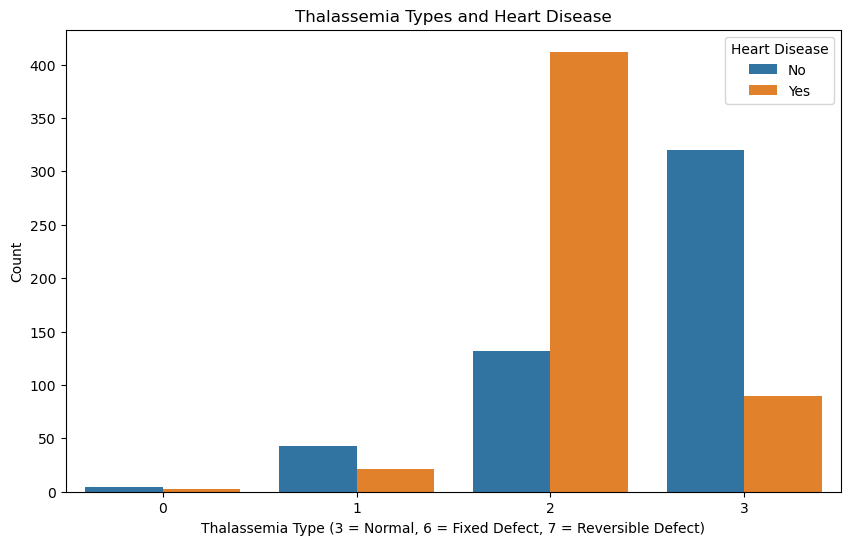

target         0         1
thal                      
0       0.571429  0.428571
1       0.671875  0.328125
2       0.242647  0.757353
3       0.780488  0.219512


In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='thal', hue='target', data=data)
plt.title('Thalassemia Types and Heart Disease')
plt.xlabel('Thalassemia Type (3 = Normal, 6 = Fixed Defect, 7 = Reversible Defect)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

# Cross-tabulation of thalassemia type and heart disease presence
thal_heart_disease = pd.crosstab(data['thal'], data['target'], normalize='index')
print(thal_heart_disease)

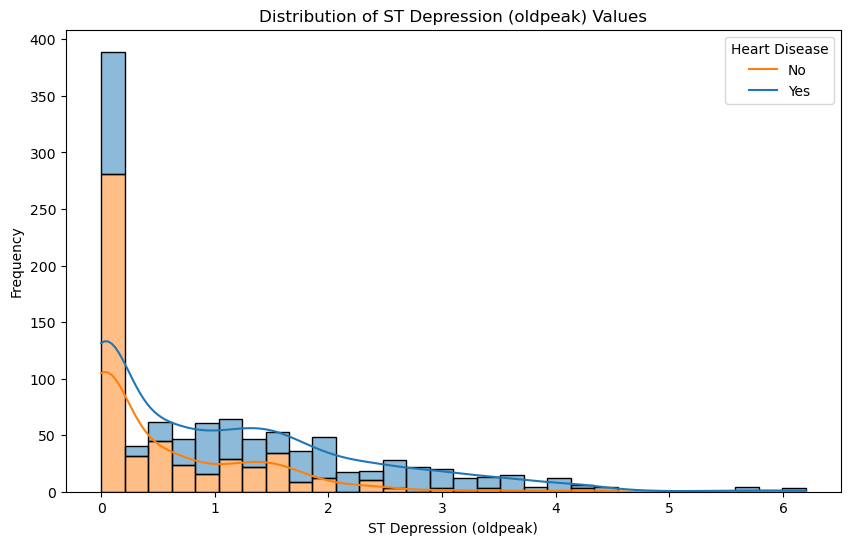

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='oldpeak', hue='target', multiple='stack', bins=30, kde=True)
plt.title('Distribution of ST Depression (oldpeak) Values')
plt.xlabel('ST Depression (oldpeak)')
plt.ylabel('Frequency')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()